In [28]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (10.0, 10.0)

K-Means Module

In [29]:
class KMeans:
    def __init__(self, dataset, k, path):
        self.dataset = dataset
        self.k = k
        self.num = dataset.shape[0]
        self.dim = dataset.shape[1]
        self.df = pd.DataFrame(dataset, columns=['x', 'y'])
        self.path = path
    def _dist(self, x1, x2):
        return np.sum(np.power(x1 - x2, 2))
    def _center(self):
        centers = np.zeros((self.k, self.dim))
        s = set()
        for i in range(self.k):
            # Generate non-repeated index
            while True:
                index = int(np.random.uniform(0, self.num + 1))
                if index not in s:
                    s.add(index)
                    break
            centers[i, :] = self.dataset[index, :]
        return centers
    def _plot(self, labels, idx):
        self.df['target'] = labels[:, 0].astype('int')
        plot = sns.lmplot(x='x', y='y', data=self.df, fit_reg=False, hue='target', legend=False, size=8)
        fig = plot.fig
        fig.suptitle("Iteration {}".format(idx), fontsize=12)
        fig.savefig(self.path + '{}.png'.format(idx))
        
    def fit(self, init_center=None):
        # cluster_mat store two information of each instance
        # First dim: which cluster the instance belongs to
        # Second dim: the distance between instance and center
        cluster_mat = np.mat(np.zeros((self.num, 2)))
        # Indicator of the loop
        cluster_flag = True
        # Randomly generate centers
        # centers = self._center()
        if init_center is None:
            centers = self._center()
        else:
            centers = init_center
        
        idx = 0
        while cluster_flag:
            cluster_flag = False
            # Assign points to corresponding centers based on distance
            for i in range(self.num):
                min_dist = float('inf')
                min_idx = -1
                for j in range(self.k):
                    dist = self._dist(centers[j, :], self.dataset[i, :])
                    if dist < min_dist:
                        min_dist = dist
                        min_idx = j
                if cluster_mat[i, 0] != min_idx:
                    cluster_flag = True
                    cluster_mat[i, :] = min_idx, min_dist
            
            # Update center of each clustering
            for j in range(self.k):
                cluster_points = self.dataset[np.nonzero(cluster_mat[:, 0].A == j)[0]]
                centers[j, :] = np.mean(cluster_points, axis=0)
            self._plot(cluster_mat, idx)
            idx = idx+1
            if idx == 1000:
                cluster_flag = False
        return centers, cluster_mat

Circle data

In [30]:
data = []
with open('./data/circle.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if line == '':
            continue
        x, y = line.split(',')
        data.append([float(x), float(y)])
data = np.array(data)
data.shape

(1500, 2)

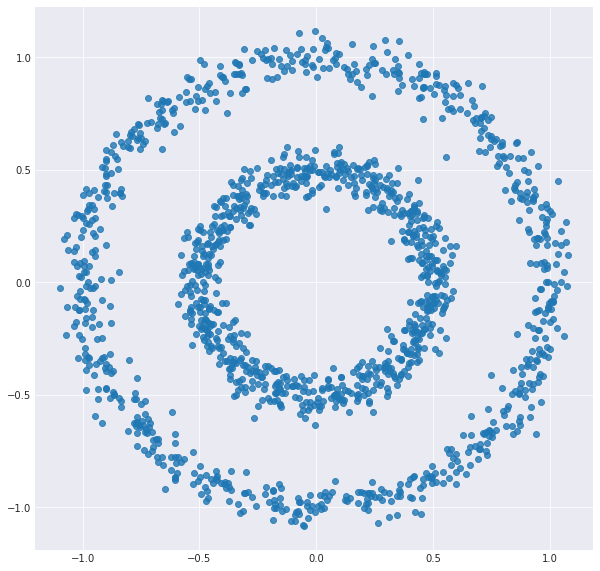

In [31]:
plot = sns.regplot(x=data[:, 0], y=data[:, 1], fit_reg=False)

[[-0.47991609 -0.05749775]
 [ 0.46901134  0.05484501]]
[[0.         0.        ]
 [1.         0.04133146]
 [1.         0.20407695]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [1.         0.3660454 ]]


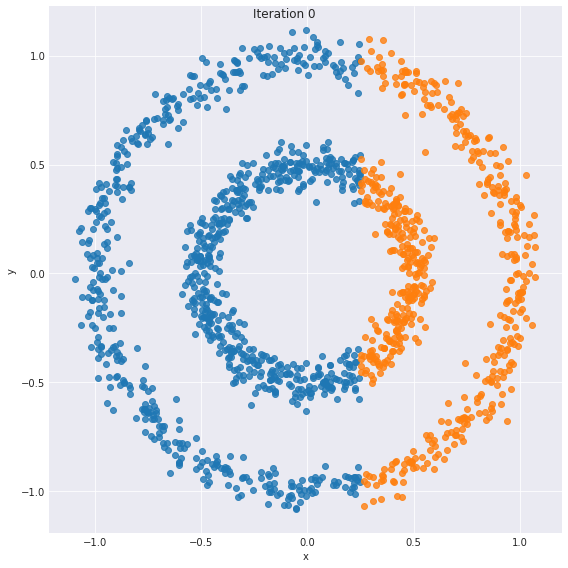

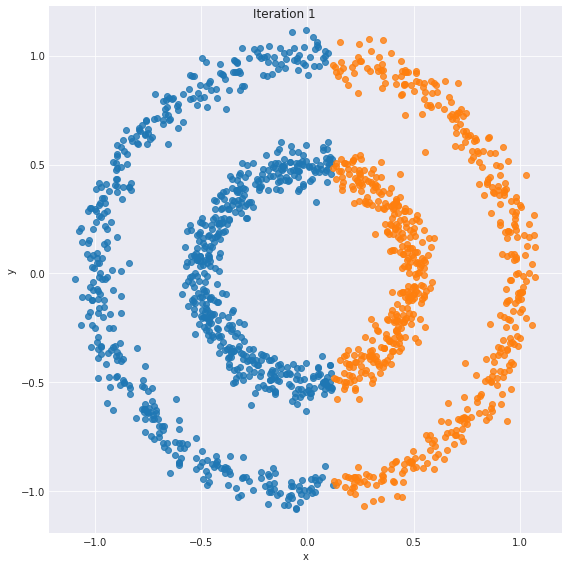

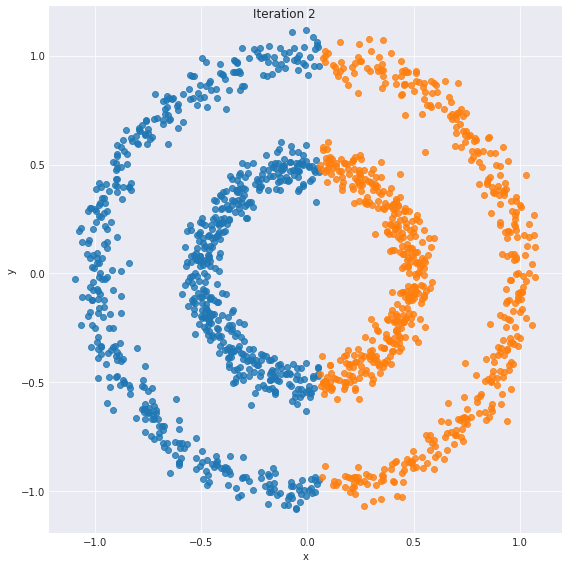

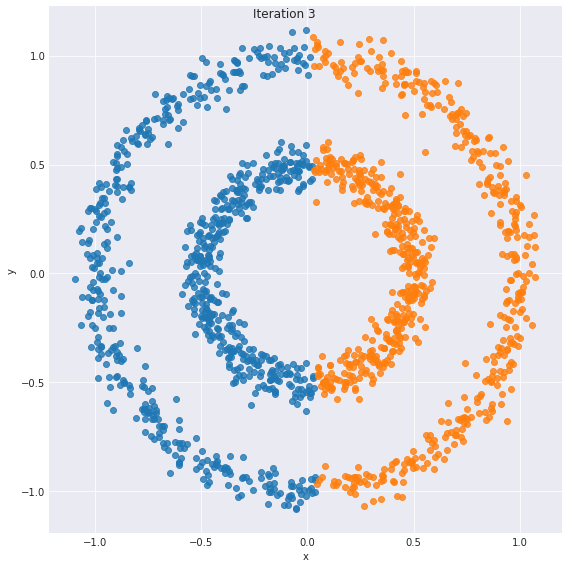

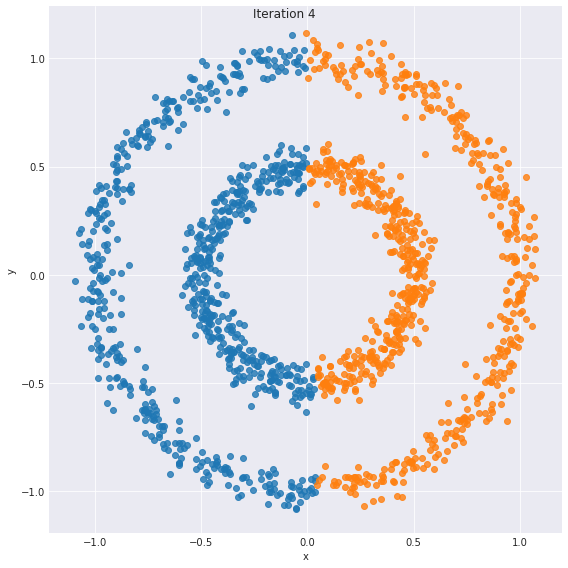

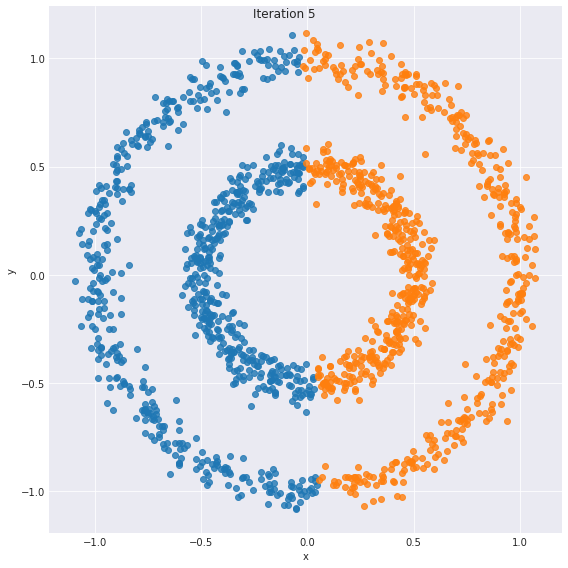

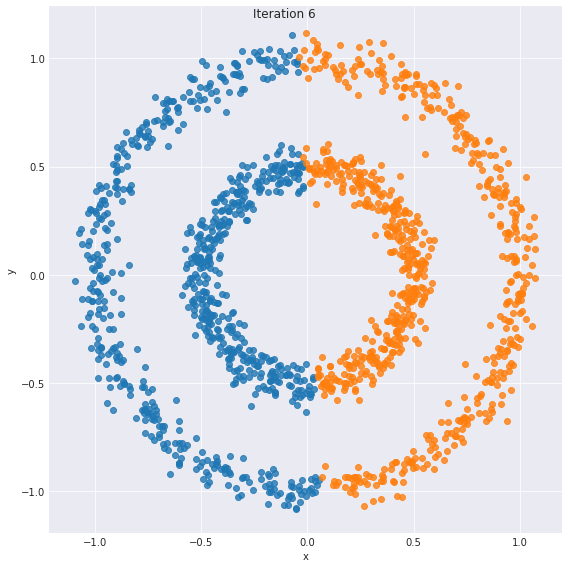

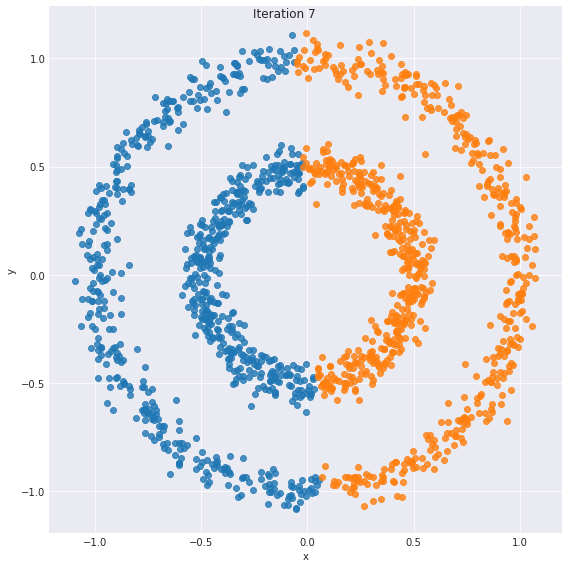

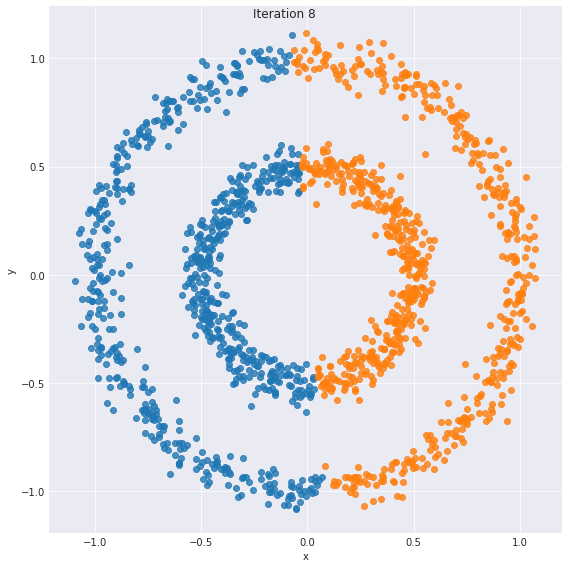

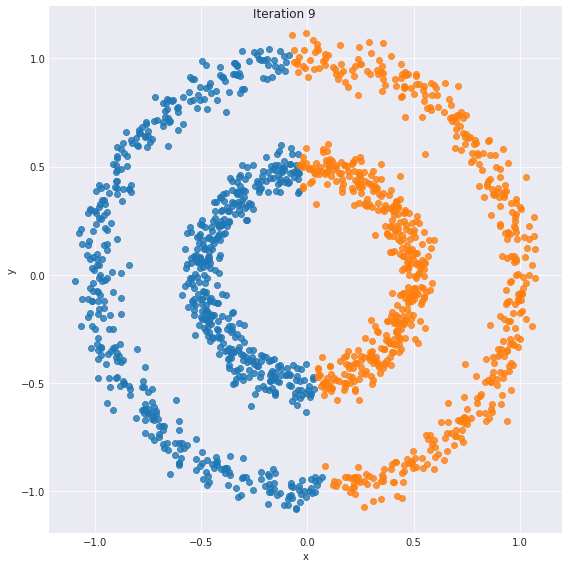

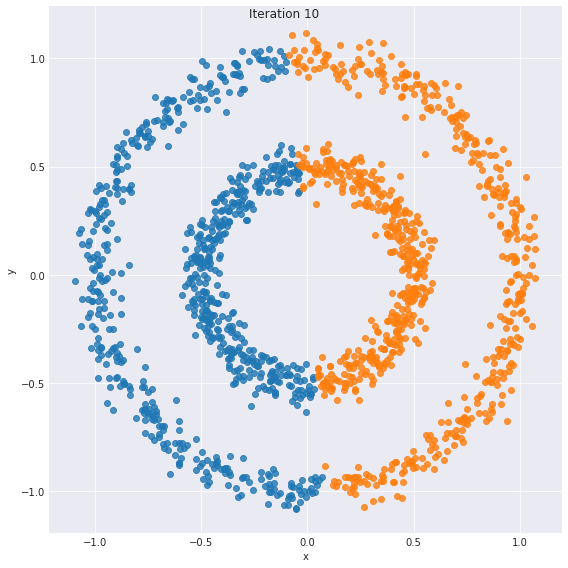

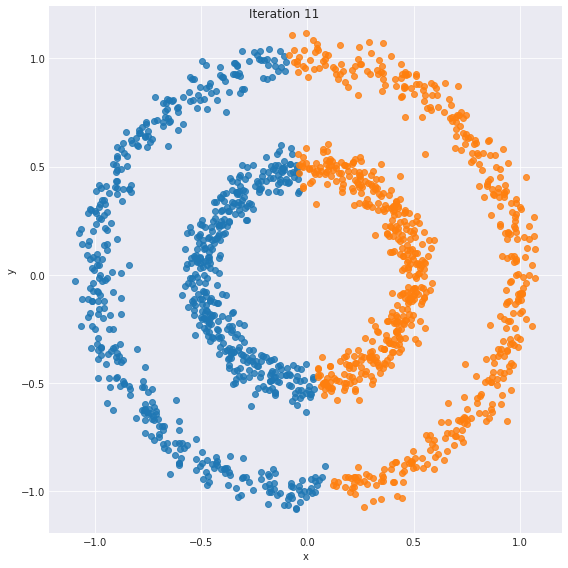

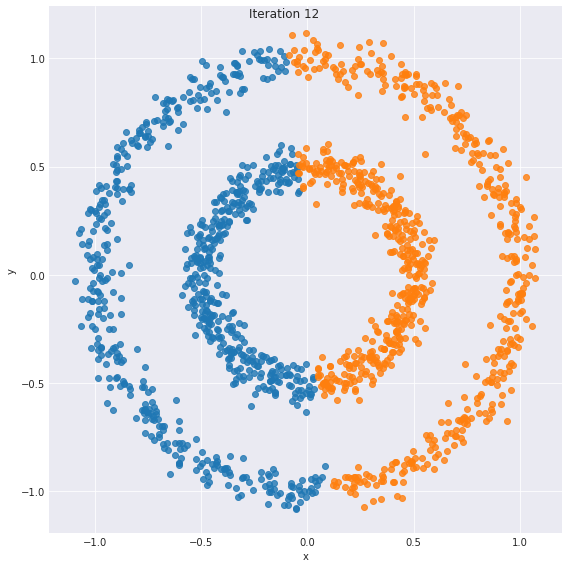

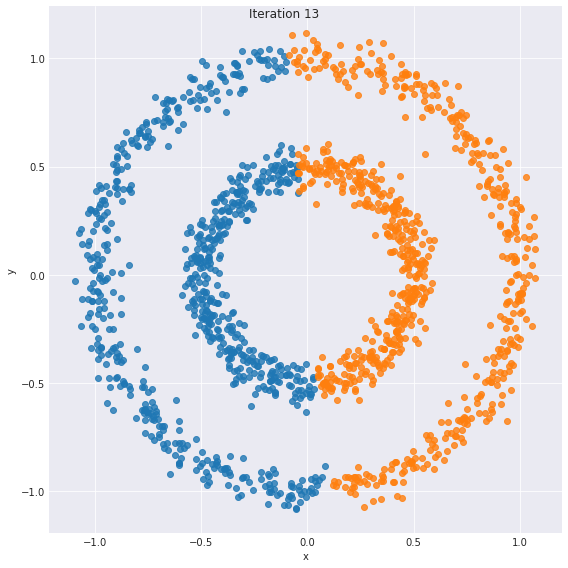

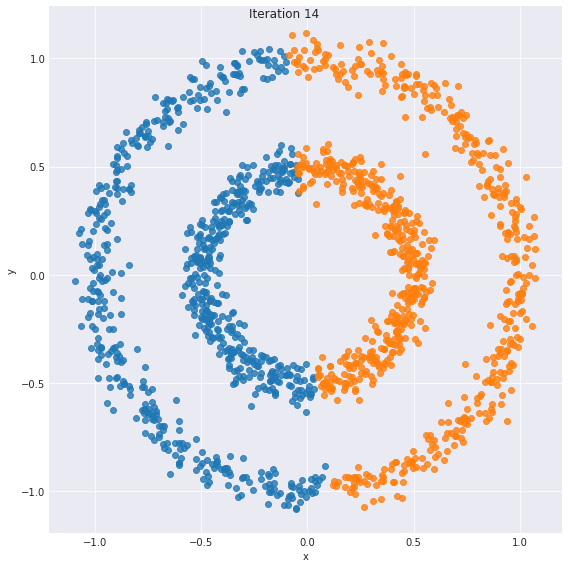

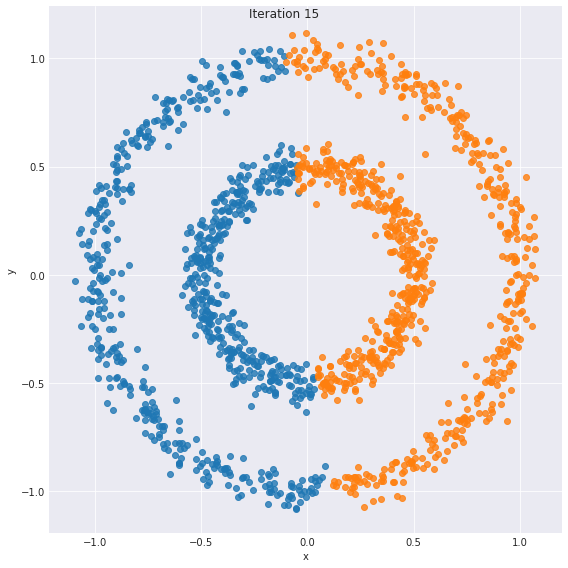

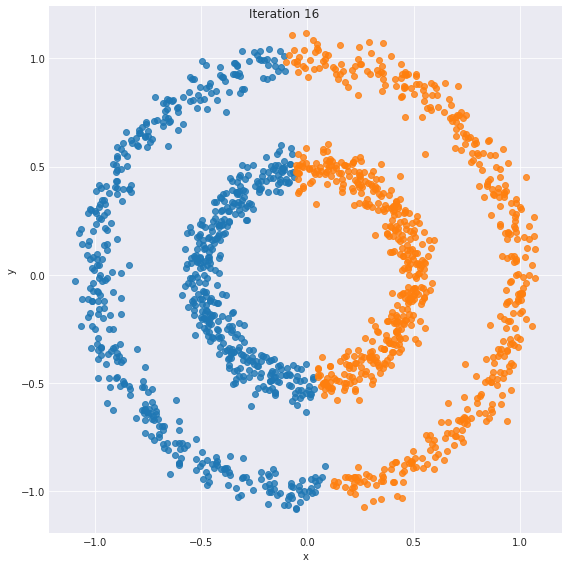

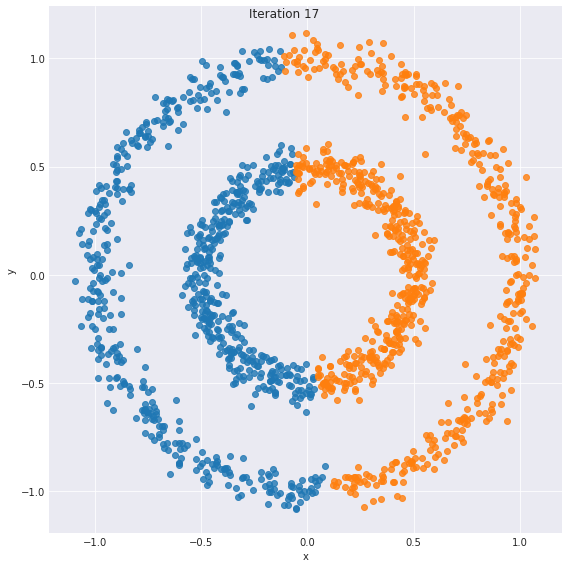

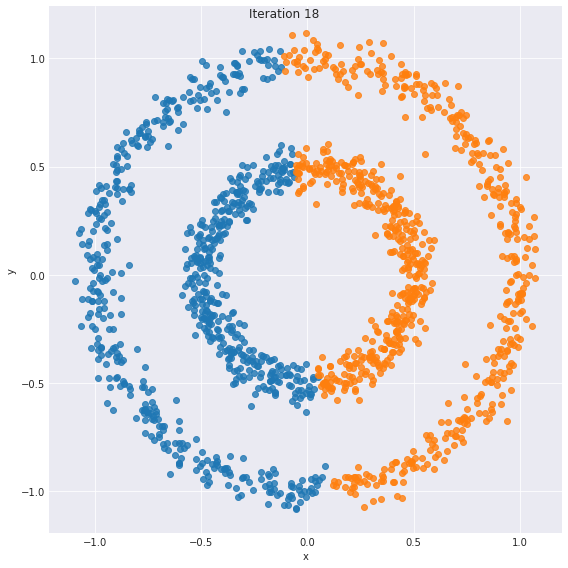

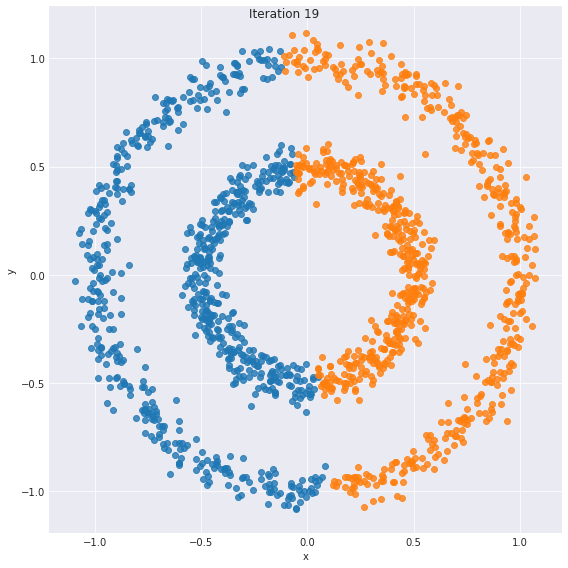

In [32]:
kmeans = KMeans(data, 2, './circle/')
init_center = np.array([
    [-0.5, 0],
    [1, 0]
])
centers, labels = kmeans.fit(init_center)
print(centers)
print(labels)

Moon data

In [33]:
data = []
with open('./data/moon.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if line == '':
            continue
        x, y = line.split(',')
        data.append([float(x), float(y)])
data = np.array(data)
data.shape

(1500, 2)

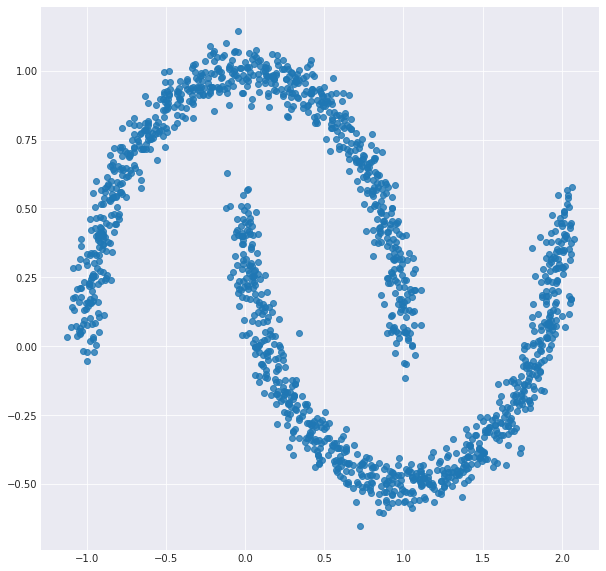

In [34]:
plot = sns.regplot(x=data[:, 0], y=data[:, 1], fit_reg=False)

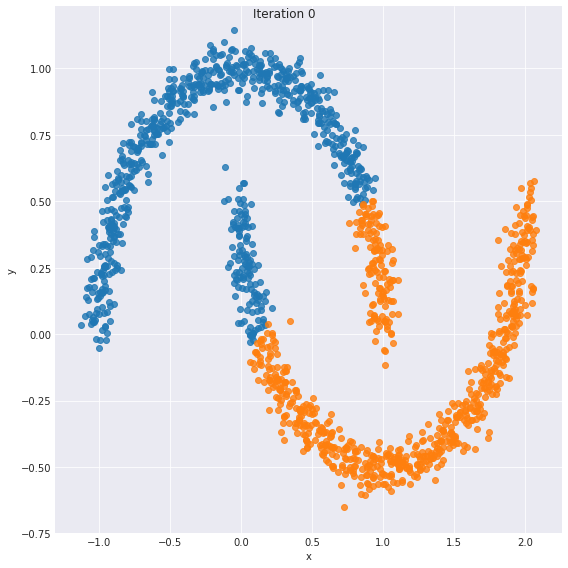

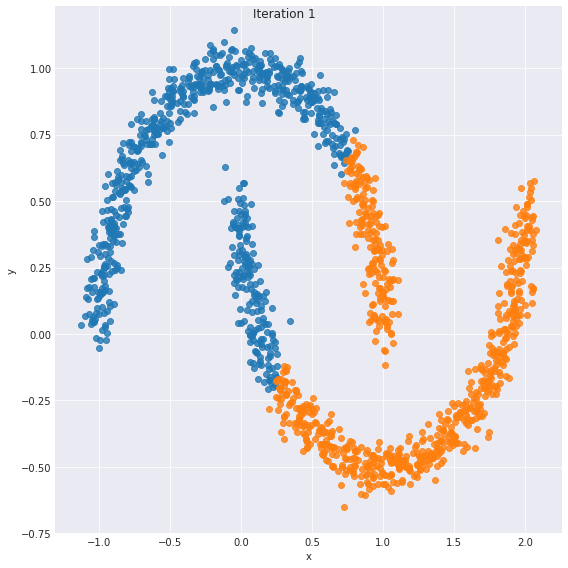

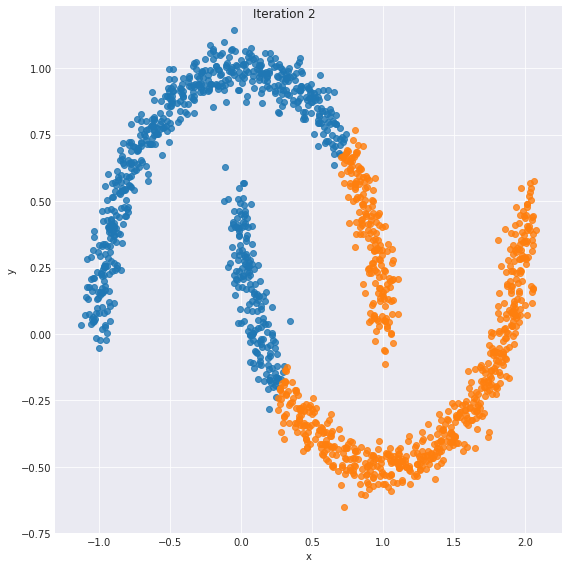

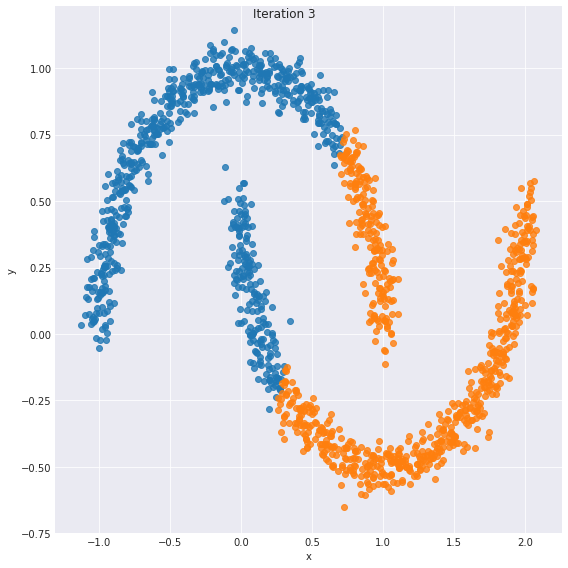

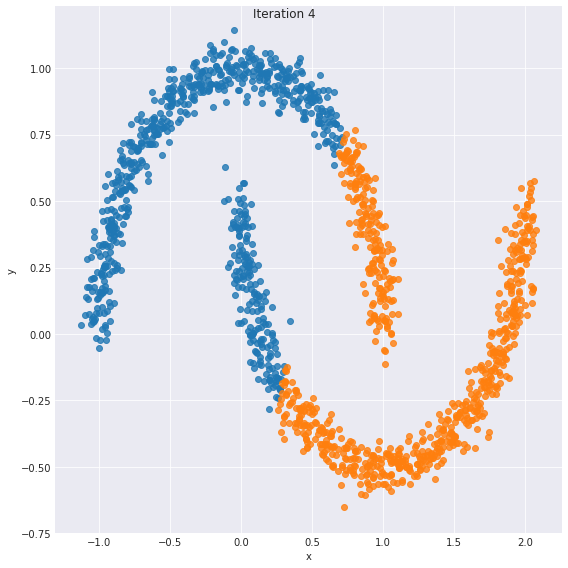

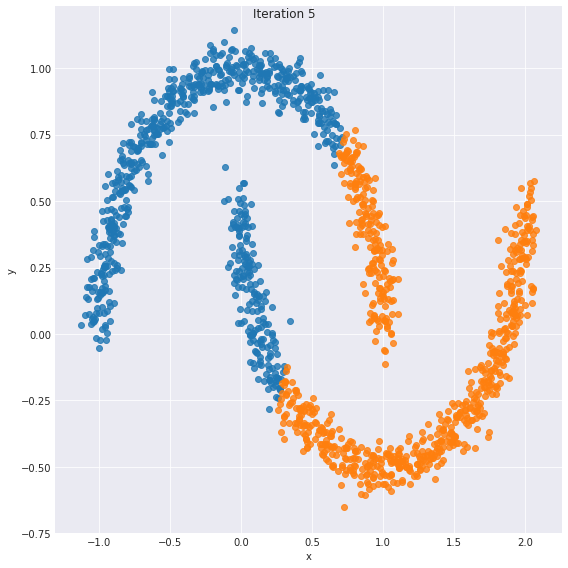

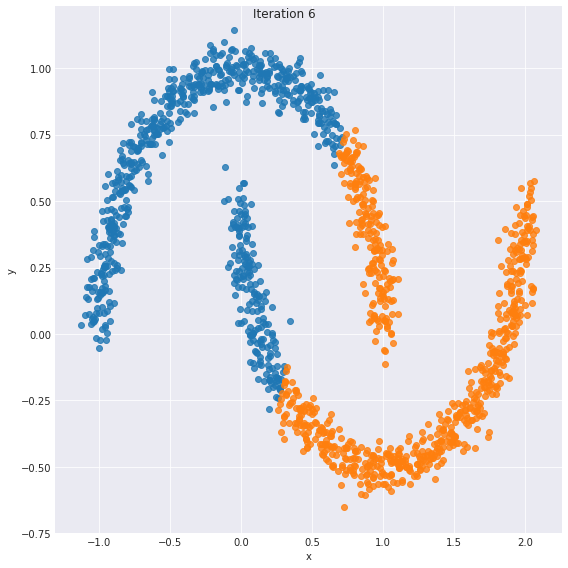

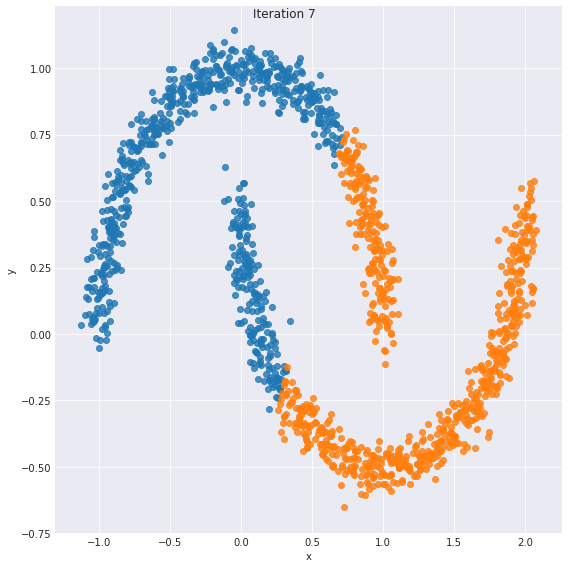

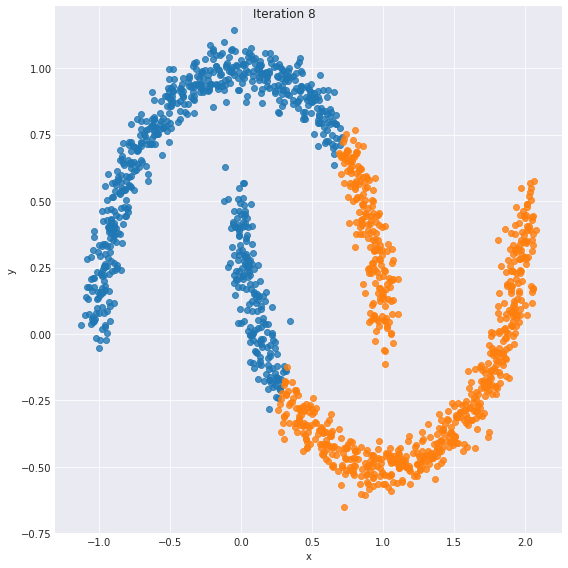

In [35]:
kmeans = KMeans(data, 2, './moon/')
init_center = np.array([
    [0, 1],
    [1, -0.5]
])
centers, labels = kmeans.fit(init_center)